In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# loading datasets
X_train = pd.read_csv("kdd99_training_data.csv")
X_test = pd.read_csv("kdd99_testing_data.csv")
y_train = pd.read_csv("kdd99_training_labels.csv")
y_test = pd.read_csv("kdd99_testing_labels.csv")
y_train=y_train.label.astype(str)
y_test=y_test.label.astype(str)
X_train=X_train.astype(str)
y_train=y_train.astype(str)

# X_train=X_train.sample(n=50000).astype(str)
# y_train=y_train.sample(n=50000).astype(str)
# X_test=X_test.sample(n=16666)
# y_test=y_test.sample(n=16666)
print(y_train.shape)
print(X_test.shape)
print(y_train.unique())

(370515,)
(123505, 32)
['normal' 'dos' 'r2l' 'probe' 'u2r']


In [3]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
     

In [4]:
# Building confusion matrix and printing classification report
conf_matrix = confusion_matrix(y_test, pred)
print(classification_report(y_test,pred))
     

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     97676
      normal       1.00      1.00      1.00     24482
       probe       1.00      1.00      1.00      1056
         r2l       1.00      0.98      0.99       279
         u2r       0.80      0.67      0.73        12

    accuracy                           1.00    123505
   macro avg       0.96      0.93      0.94    123505
weighted avg       1.00      1.00      1.00    123505



In [5]:
# building annotations
y_labels = ['dos', 'normal', 'probe', 'r2l', 'u2r']
labels = []
for i in range(5):
  for j in range(5):
    labels.append(str(f"Real {y_labels[i]}\nPredicted {y_labels[j]}\n{conf_matrix[i, j]}"))

labels = np.asarray(labels).reshape(5, 5)

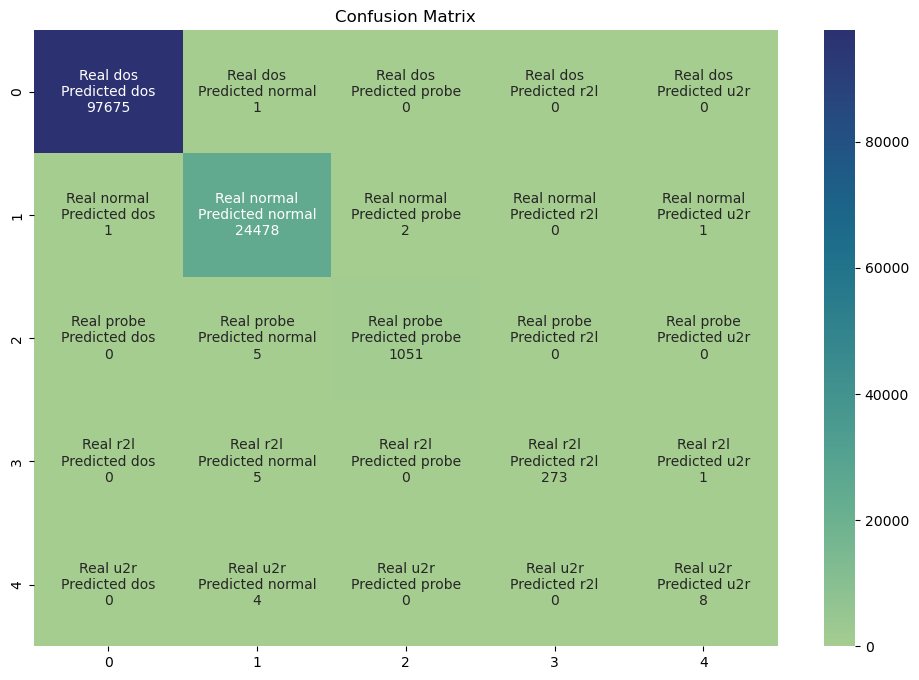

In [6]:
# confusion matrix visualization
plt.figure(figsize=(12, 8))
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix, annot=labels, cmap='crest', fmt='')
plt.show()
     